# Lab 3: Clustering and Manifold Learning
In this Notebook I will be introduced to standard techniques for unsupervised ML used also for EDA. These include the k-Means clustering algorithm and manifold-learning techniques, such as multi-dimensional scaling (MSD) and t-SNE. The goal of this exercise is to practice these techniques for discovering and visualising hidden patterns in data.
##### Task1
I am going to cluster the ___bank___ dataset after I prepared it for Machine Learing in the previous lab using K-Means clustering Algorithm.
##### Task2
I will plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one I used in Task 1), then compute a new k-Means clustering.
##### Task3
Implement and plot the results of the Silhouette method for determining the best value of k for k-Means. Compare the results of the Elbow method to the results of the Silhouette method.
##### Task4
Apply another clustering algorithm (from the ones available in scikit-learn) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Loading the dataset

In [2]:
df = pd.read_csv("./loans_train_prepared.csv")
data=df
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.isnull().sum()

Dependents                 0
ApplicantIncome            0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Gender_nan                 0
Married_Yes                0
Married_nan                0
Self_Employed_Yes          0
Self_Employed_nan          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
TotalIncome                0
dtype: int64

### Task 1: Using KNN Algorithm in the prepared dataset loan


In [4]:
df

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.750,1.0,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.750,1.0,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.750,1.0,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.860305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708
610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496
611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075
612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256


I will call the Kmeans method and have
- 3 cluster groups
- run 10 times with different random clusters and pick the min inertia
- run 300 iterations
and finally fitting the model with the data

In [40]:
k=4
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [41]:
clustered_data_sklearn

KMeans(n_clusters=4)

In [42]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

##### Apply a manifold-learning technique to project the data set to a 2D space
https://scikit-learn.org/stable/modules/manifold.html

In [43]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

Im going to apply multi-dimensional scaling __MDS__ to project the dataset into 2d space and using a function __clustering_scatterplot__ to plot it.

In [44]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

Applying MDS

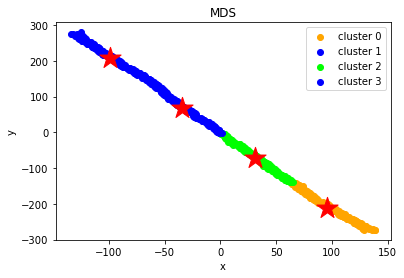

In [45]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

Applying t-SNE

In [46]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


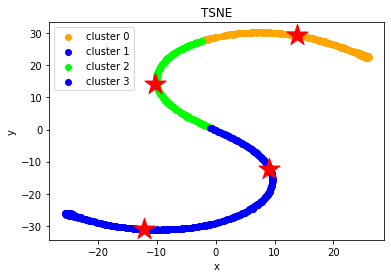

In [47]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [48]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,1
1,0.333333,0.925883,1.047319,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,1
2,0.000000,0.683858,0.635920,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,1
3,0.000000,0.608992,1.002824,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,1
4,0.000000,1.101869,1.115650,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,1


In [49]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.293860,0.913302,1.100967,0.703947,0.842105,0.782895,0.039474,0.671053,0.000000,0.151316,0.046053,0.256579,0.407895,0.256579,0.684211,0.881140
1,0.232258,0.890352,1.057009,0.714516,0.864516,0.819355,0.012903,0.658065,0.006452,0.129032,0.058065,0.193548,0.387097,0.445161,0.670968,0.845084
2,0.241830,0.932128,1.060333,0.715196,0.843137,0.777778,0.019608,0.620915,0.006536,0.143791,0.058824,0.222222,0.333333,0.313725,0.705882,0.861077
3,0.225108,0.930800,1.086922,0.719643,0.870130,0.805195,0.012987,0.642857,0.006494,0.110390,0.045455,0.201299,0.389610,0.298701,0.688312,0.863786


__Conclusion__

After observing the 4 clusters, I can make out that:
- cluster 0 has the highest Total income, Loan amount, highest married status and have more graduates.

- Theres nothing special about cluster 1, this might indicate that I might only need 3 instead of 4 clusters.

- cluster 2 has the highest applicant income, smallest group of non married people, and the group with the highet=st percentage of a positive Loan status.

- cluster 3 has the least dependents, second highest Loam amount and there total income in inbetween the other clusters.

##### Task 2: To find the best value of k using Elbow Criterion Method

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


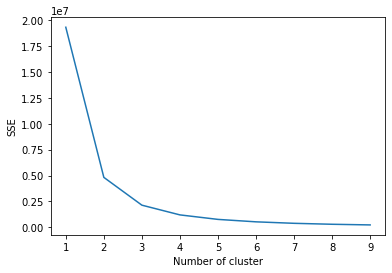

In [50]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

##### Task 3: To find the best value of k using Silhouette method

For n_clusters=2, the silhouette score is 0.5348036563814288
For n_clusters=3, the silhouette score is 0.5348036563814288
For n_clusters=4, the silhouette score is 0.5348036563814288
For n_clusters=5, the silhouette score is 0.5348036563814288
For n_clusters=6, the silhouette score is 0.5348036563814288
For n_clusters=7, the silhouette score is 0.5348036563814288
For n_clusters=8, the silhouette score is 0.5348036563814288


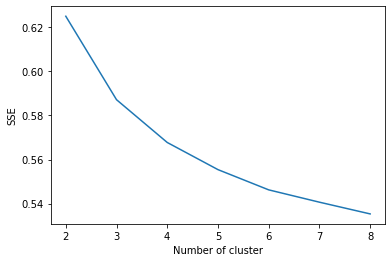

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette = {}

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette[num_clusters] = silhouette_score(data, cluster_labels, metric= 'euclidean')
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    
plt.figure()
plt.plot(list(silhouette.keys()), list(silhouette.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show() 

Looking at the two methods above I can assume that the __best value for k is 3__